In [1]:
print("""
@Description: Introducing Scikit-Learn
@Author: Stephen CUI
@Time: 2023-04-10 14:30:03
""")


@Description: Introducing Scikit-Learn
@Author: Stephen CUI
@Time: 2023-04-10 14:30:03



# Introducing Scikit-Learn

In [39]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
iris = sns.load_dataset('iris')

In [6]:
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris,
                                                    random_state=1)

In [8]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_model = model.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.9736842105263158

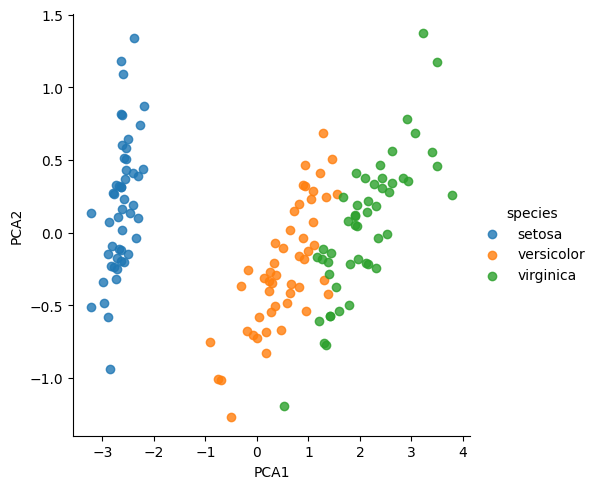

In [12]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x='PCA1', y='PCA2', hue='species', data=iris, fit_reg=False)

In [13]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3,
                        covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

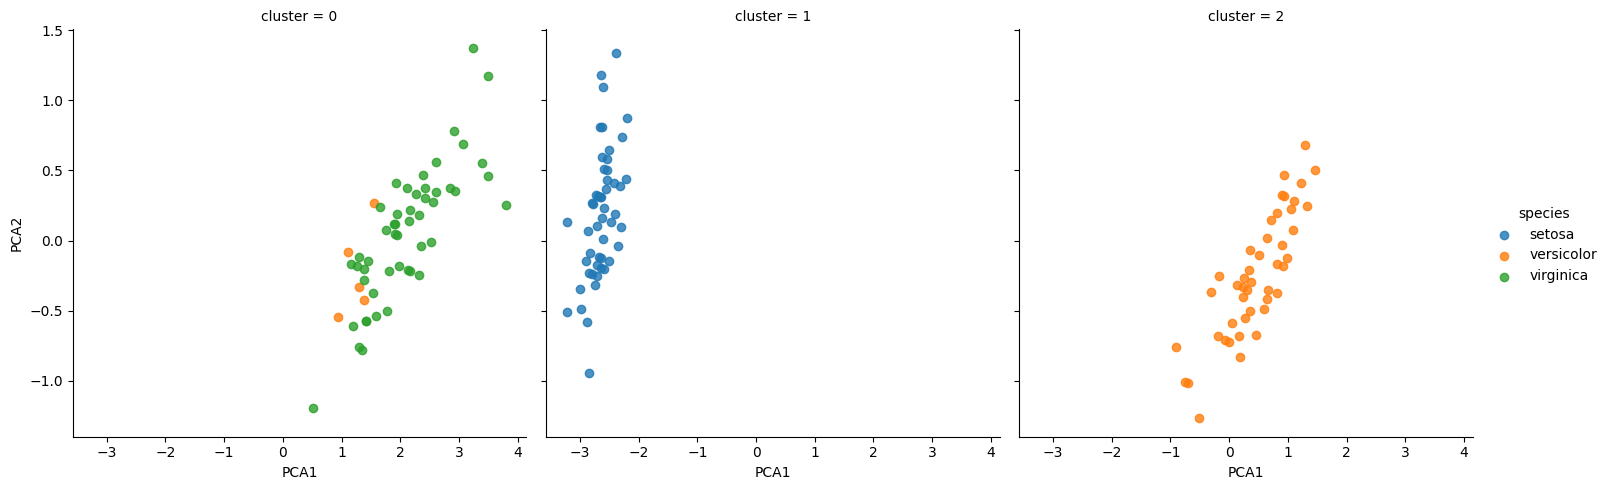

In [17]:
iris['cluster'] = y_gmm
sns.lmplot(x='PCA1', y='PCA2', data=iris, hue='species', 
           col='cluster',
           fit_reg=False)

In [19]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

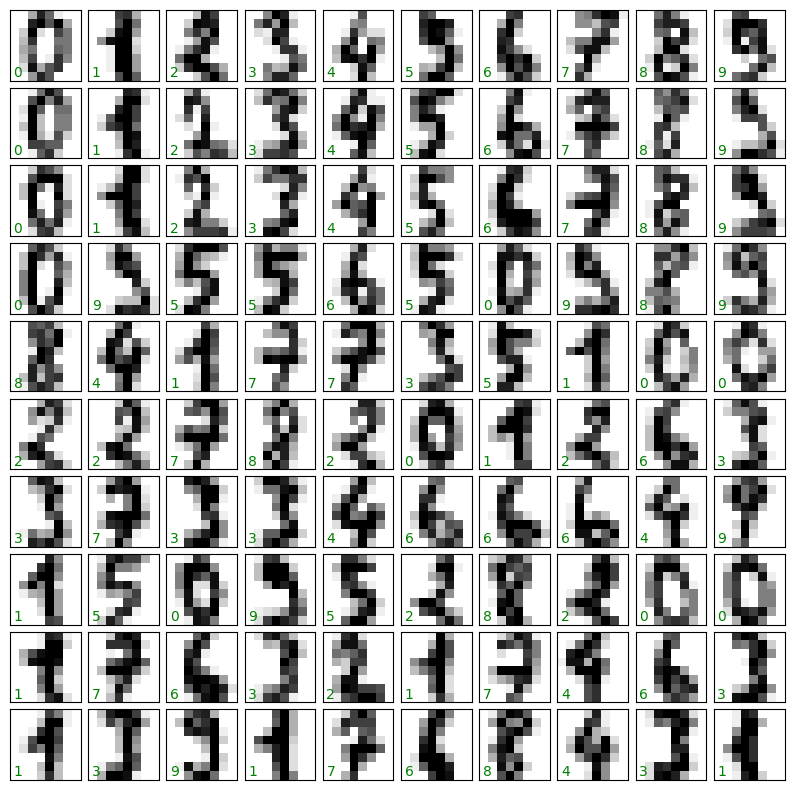

In [21]:
fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                         subplot_kw={'xticks': [], 'yticks':[]},
                         gridspec_kw=dict(hspace=.1, wspace=.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(.05, .05, str(digits.target[i]),
            transform=ax, color='green')

In [23]:
X = digits.data
y = digits.target
X.shape, y.shape

((1797, 64), (1797,))

In [26]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2, n_neighbors=10)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

C:\Users\19243\AppData\Local\Temp\ipykernel_15880\2835023466.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=mpl.cm.get_cmap('viridis', 10))


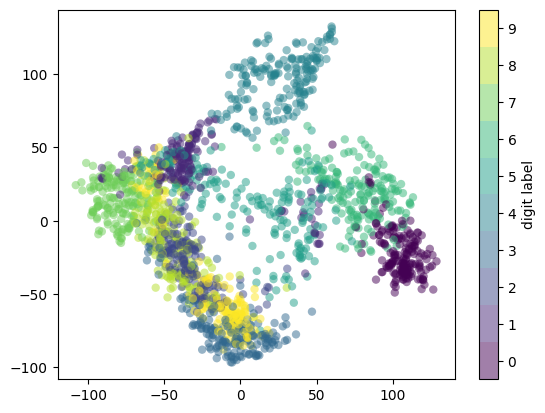

In [50]:
plt.scatter(data_projected[:, 0], data_projected[:, 1],
            c=digits.target, edgecolors='none', alpha=.5,
            cmap=mpl.cm.get_cmap('viridis', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-.5, 9.5)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_model = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.8333333333333334

Text(113.9222222222222, 0.5, 'true value')

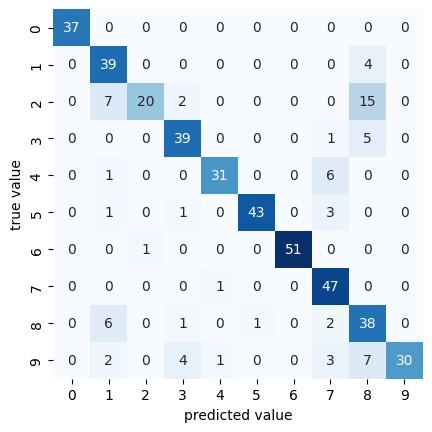

In [57]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Blues')
plt.xlabel('predicted value')
plt.ylabel('true value')

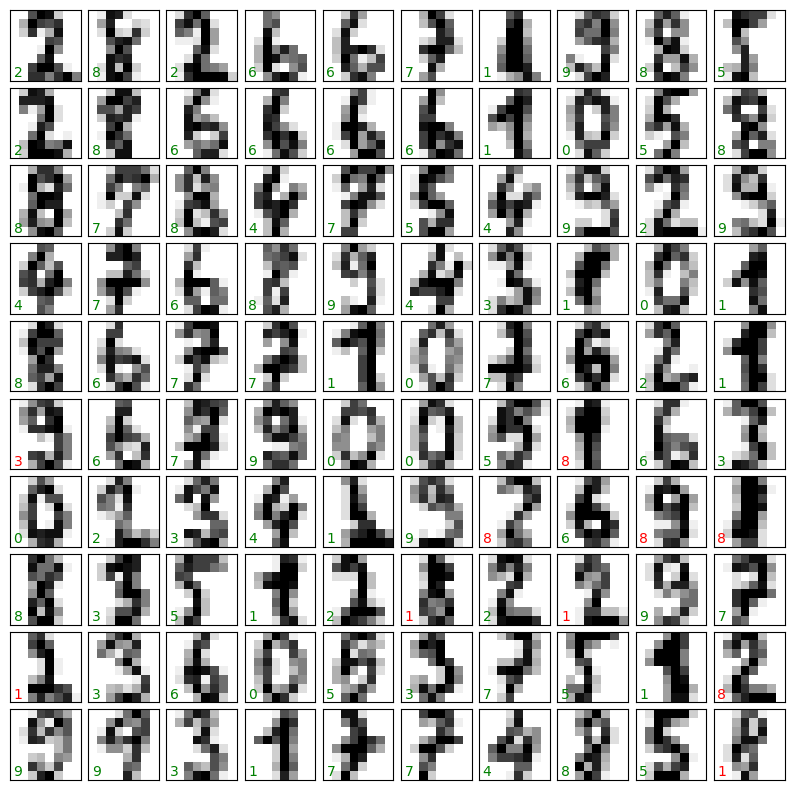

In [60]:
fig, ax = plt.subplots(10, 10, figsize=(10, 10),
                       subplot_kw={'xticks': [], 'yticks':[]},
                       gridspec_kw=dict(hspace=.1, wspace=.1))
test_images = X_test.reshape(-1, 8, 8)
for i, ax in enumerate(ax.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(.05, .05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (y_test[i] == y_model[i]) else 'red')